In [37]:
import numpy as np

# Nombre de trajets
num_paths = 5  

fs = 1000 
T = 1.0 / fs  
time = np.arange(0, 1, T) 
# Génération des délais aléatoires (0 à 10 ms)
delays = np.random.uniform(0, 0.27, num_paths)  

# Génération des coefficients complexes aléatoires
coefficients = np.random.randn(num_paths) + 1j * np.random.randn(num_paths)  

# Affichage des coefficients et délais
for i in range(num_paths):
    print(f"Trajet {i+1} : h_i = {coefficients[i]}, délai = {delays[i]:.5f} s")


Trajet 1 : h_i = (-0.4929769739383538+1.0818907703832399j), délai = 0.06689 s
Trajet 2 : h_i = (-0.23300930528150143+0.5482825262475354j), délai = 0.14860 s
Trajet 3 : h_i = (-1.0089308503078294-0.2471285857549794j), délai = 0.07207 s
Trajet 4 : h_i = (-0.9557109495786688+0.14977318026120207j), délai = 0.17277 s
Trajet 5 : h_i = (-0.6859366466003932-0.1789228709548399j), délai = 0.15134 s


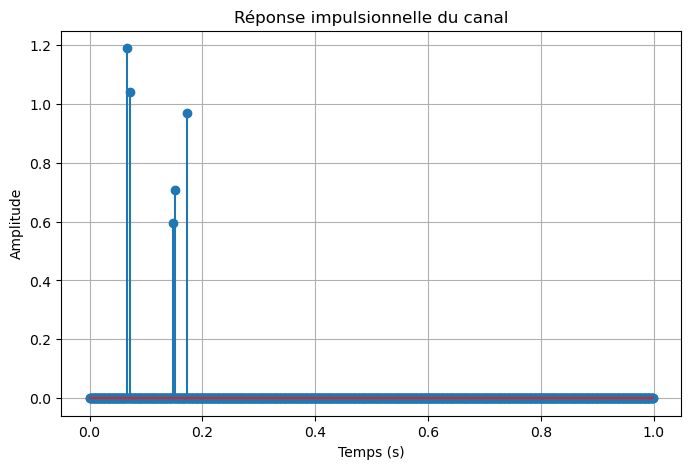

In [38]:
import matplotlib.pyplot as plt

# Création de la réponse impulsionnelle du canal
h_t = np.zeros_like(time, dtype=complex)
for i in range(num_paths):
    delay_idx = int(delays[i] * fs)  # Conversion du délai en indices
    if delay_idx < len(time):
        h_t[delay_idx] += coefficients[i]

# Affichage de la réponse impulsionnelle
plt.figure(figsize=(8, 5))
plt.stem(time, np.abs(h_t))
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Réponse impulsionnelle du canal")
plt.grid()
plt.show()


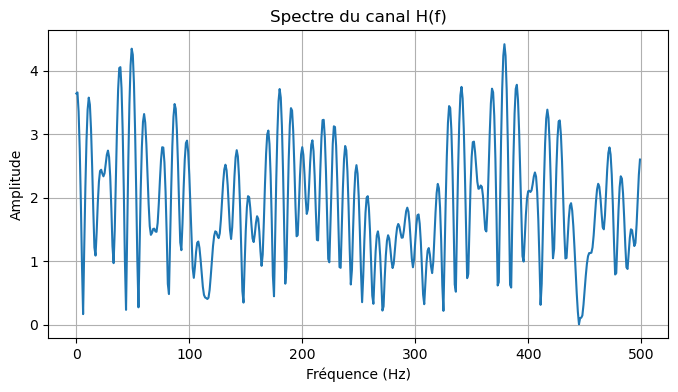

In [39]:
from scipy.fftpack import fft, fftfreq

# Calcul de la transformée de Fourier H(f)
H_f = fft(h_t)
freqs = fftfreq(len(time), T)  # Axe des fréquences

# Affichage du spectre
plt.figure(figsize=(8, 4))
plt.plot(freqs[:len(freqs)//2], np.abs(H_f[:len(H_f)//2]))  # On affiche seulement la moitié positive
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.title("Spectre du canal H(f)")
plt.grid()
plt.show()


In [40]:
# Approximation de la bande de cohérence (largeur à -3dB)
H_magnitude = np.abs(H_f[:len(H_f)//2])
bandwidth_3dB = freqs[np.where(H_magnitude >= np.max(H_magnitude)/np.sqrt(2))[-1][-1]]

print(f"Bande de cohérence approximative : {bandwidth_3dB:.2f} Hz")


Bande de cohérence approximative : 428.00 Hz


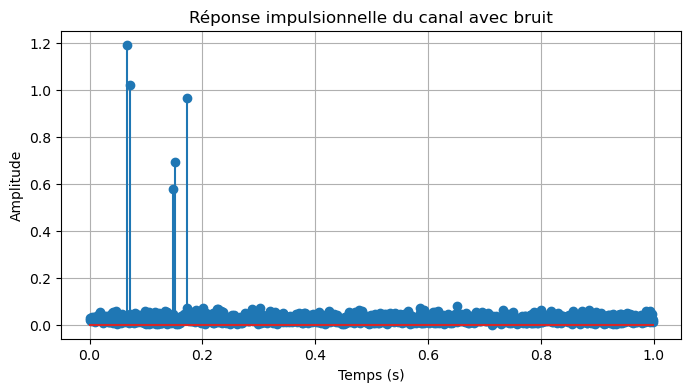

In [41]:
# Ajout du bruit blanc gaussien
snr_db = 10  # Rapport signal/bruit en dB
power_signal = np.mean(np.abs(h_t)**2)
power_noise = power_signal / (10**(snr_db / 10))

noise = np.sqrt(power_noise) * (np.random.randn(len(h_t)) + 1j * np.random.randn(len(h_t)))
h_t_noisy = h_t + noise

# Affichage de la réponse impulsionnelle avec bruit
plt.figure(figsize=(8, 4))
plt.stem(time, np.abs(h_t_noisy))
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Réponse impulsionnelle du canal avec bruit")
plt.grid()
plt.show()


In [22]:
import numpy as np

# Paramètres du canal
fc = 2e9  # Fréquence porteuse (Hz)
v = 30  # Vitesse du mobile (m/s)
c = 3e8  # Vitesse de la lumière (m/s)
angles_deg = np.array([0, 20, 40, 60, -45])  # Angles en degrés

# Conversion en radians
angles_rad = np.radians(angles_deg)

# Calcul du décalage Doppler pour chaque trajet
doppler_shifts = (v / c) * fc * np.cos(angles_rad)

# Affichage des résultats
for i, fd in enumerate(doppler_shifts):
    print(f"Trajet {i+1}: Décalage Doppler = {fd:.2f} Hz")


Trajet 1: Décalage Doppler = 200.00 Hz
Trajet 2: Décalage Doppler = 187.94 Hz
Trajet 3: Décalage Doppler = 153.21 Hz
Trajet 4: Décalage Doppler = 100.00 Hz
Trajet 5: Décalage Doppler = 141.42 Hz


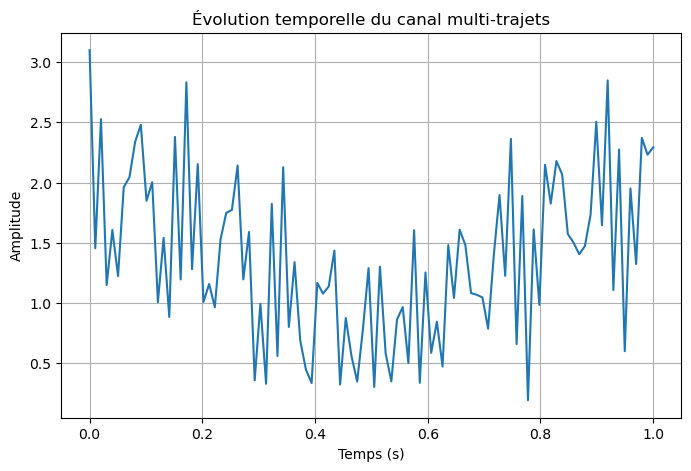

In [27]:
import matplotlib.pyplot as plt

T_sim = 1  # Simulation sur 1 seconde
fs = 100  #  d'échantillonnage (Hz)
t = np.linspace(0, T_sim, fs)  # Axe du temps

# Amplitudes des trajets
amplitudes = np.array([1, 0.5, 0.6, 0.8, 0.2])

# Génération du canal dans le temps
h_t = np.zeros_like(t, dtype=complex)

for i in range(len(amplitudes)):
    h_t += amplitudes[i] * np.exp(1j * 2 * np.pi * doppler_shifts[i] * t)

# Affichage de l'évolution temporelle du module de h(t)
plt.figure(figsize=(8, 5))
plt.plot(t, np.abs(h_t))
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Évolution temporelle du canal multi-trajets")
plt.grid()
plt.show()


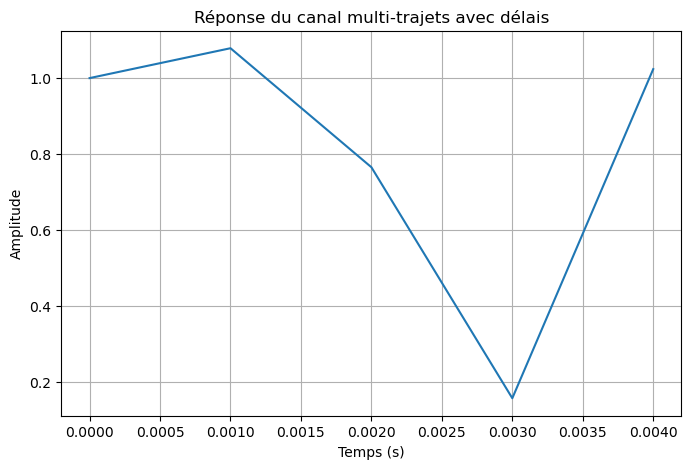

In [32]:
# Délais des trajets en millisecondes (convertis en secondes)
delays_ms = np.array([0, 2, 4, 3, 1])
delays = delays_ms / 1000  # Conversion en secondes

# Création de la réponse impulsionnelle
h_t_delayed = np.zeros_like(t, dtype=complex)

for i in range(len(amplitudes)):
    delay_idx = int(delays[i] * fs)  # Conversion du délai en indices
    if delay_idx < len(t):
        h_t_delayed[delay_idx:] += amplitudes[i] * np.exp(1j * 2 * np.pi * doppler_shifts[i] * t[:len(t)-delay_idx])

# Affichage de la réponse dans le temps
plt.figure(figsize=(8, 5))
plt.plot(t, np.abs(h_t_delayed))
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Réponse du canal multi-trajets avec délais")
plt.grid()
plt.show()
